# Laboratorio - Modelo SVM (SVC)
## Curso: Inteligencia de Negocios
## Docente: Ernesto Cancho Rodriguez

### Instalamos yfinance ya que de ahí obtendremos el csv de Meta

In [2]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 36.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Importamos librerías

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
import warnings
warnings.filterwarnings("ignore")

/tmp/ipykernel_11500/3431033074.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


### Obtenemos los datos remotamente por la librería

In [8]:
meta = yf.Ticker('META')
hist = meta.history(period='max',auto_adjust=True)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-30 00:00:00-04:00,265.250000,268.649994,261.290009,262.519989,23816500,0.0,0.0
2023-05-31 00:00:00-04:00,260.000000,265.000000,258.450012,264.720001,25473700,0.0,0.0
2023-06-01 00:00:00-04:00,265.899994,274.000000,265.890015,272.609985,25609500,0.0,0.0


### Como observamos la data ya se encuentra preparada, entonces definimos las variables

In [10]:
hist['Open-Close'] = hist.Open - hist.Close
hist['High-Low'] = hist.High - hist.Low

X = hist[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2012-05-18 00:00:00-04:00,3.820000,7.000000
2012-05-21 00:00:00-04:00,2.500000,3.660000
2012-05-22 00:00:00-04:00,1.610001,2.650000
2012-05-23 00:00:00-04:00,-0.629999,1.139999
2012-05-24 00:00:00-04:00,-0.079998,1.439999


### Definimos la variable objetivo

In [11]:
y = np.where(hist['Close'].shift(-1) > hist['Close'], 1, 0)
y

array([0, 0, 1, ..., 0, 0, 0])

### Separamos los datos de entrenamiento y prueba

In [13]:
split_percentage = 0.8
split = int(split_percentage*len(hist))

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

### Creamos el modelo SVC

In [14]:
cls = SVC().fit(X_train, y_train)

### Predecimos la señal

In [15]:
hist['Predicted_Signal'] = cls.predict(X)

### Calculamos retornos diarios

In [16]:
hist['Return'] = hist.Close.pct_change()

### Calculamos retornos strategy

In [17]:
hist['Strategy_Return'] = hist.Return *hist.Predicted_Signal.shift(1)

### Calculamos retornos acumulados

In [22]:
hist['Cum_Ret'] = hist['Return'].cumsum()
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Strategy,Cum_Ret
Date,,,,,,,,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0,3.820000,7.000000,1,NaN,NaN,NaN,NaN
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0,2.500000,3.660000,1,-0.109861,-0.109861,-0.109861,-0.109861
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0,1.610001,2.650000,1,-0.089039,-0.089039,-0.198900,-0.198900
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0,-0.629999,1.139999,1,0.032258,0.032258,-0.166642,-0.166642
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0,-0.079998,1.439999,1,0.032187,0.032187,-0.134455,-0.134455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30 00:00:00-04:00,265.250000,268.649994,261.290009,262.519989,23816500,0.0,0.0,2.730011,7.359985,1,0.001832,0.001832,3.745391,2.838527
2023-05-31 00:00:00-04:00,260.000000,265.000000,258.450012,264.720001,25473700,0.0,0.0,-4.720001,6.549988,1,0.008380,0.008380,3.753772,2.846907
2023-06-01 00:00:00-04:00,265.899994,274.000000,265.890015,272.609985,25609500,0.0,0.0,-6.709991,8.109985,1,0.029805,0.029805,3.783577,2.876712


### Calculamos retornos acumulados strategy

In [23]:
hist['Cum_Strategy'] = hist['Strategy_Return'].cumsum()
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Strategy,Cum_Ret
Date,,,,,,,,,,,,,,
2012-05-18 00:00:00-04:00,42.049999,45.000000,38.000000,38.230000,573576400,0.0,0.0,3.820000,7.000000,1,NaN,NaN,NaN,NaN
2012-05-21 00:00:00-04:00,36.529999,36.660000,33.000000,34.029999,168192700,0.0,0.0,2.500000,3.660000,1,-0.109861,-0.109861,-0.109861,-0.109861
2012-05-22 00:00:00-04:00,32.610001,33.590000,30.940001,31.000000,101786600,0.0,0.0,1.610001,2.650000,1,-0.089039,-0.089039,-0.198900,-0.198900
2012-05-23 00:00:00-04:00,31.370001,32.500000,31.360001,32.000000,73600000,0.0,0.0,-0.629999,1.139999,1,0.032258,0.032258,-0.166642,-0.166642
2012-05-24 00:00:00-04:00,32.950001,33.209999,31.770000,33.029999,50237200,0.0,0.0,-0.079998,1.439999,1,0.032187,0.032187,-0.134455,-0.134455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30 00:00:00-04:00,265.250000,268.649994,261.290009,262.519989,23816500,0.0,0.0,2.730011,7.359985,1,0.001832,0.001832,3.745391,2.838527
2023-05-31 00:00:00-04:00,260.000000,265.000000,258.450012,264.720001,25473700,0.0,0.0,-4.720001,6.549988,1,0.008380,0.008380,3.753772,2.846907
2023-06-01 00:00:00-04:00,265.899994,274.000000,265.890015,272.609985,25609500,0.0,0.0,-6.709991,8.109985,1,0.029805,0.029805,3.783577,2.876712


### Plot de retornos strategy vs retornos originales

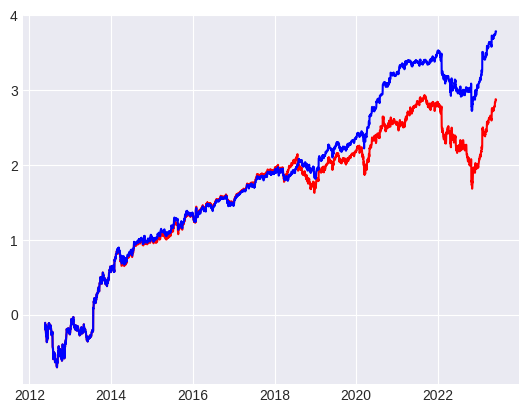

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(hist['Cum_Ret'],color='red')
plt.plot(hist['Cum_Strategy'],color='blue')

### Como podemos visualizar nuestra estrategia supera el rendimiento de la acción de Meta. Nuestra estrategia va a la par hasta el año 2018 aproximadamente, luego de eso supera consistentemente a la acción original de Meta